In [1]:
%pylab inline
import pandas as pd
import re
import seaborn as sns
figsize(13,5)

Populating the interactive namespace from numpy and matplotlib


In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

>Such is the way the gods spun life for unfortunate mortals,  
>that we live in unhappiness, but the gods themselves have no sorrows.  
>  ---  *Iliad* 24.525-526

I have compiled a list of all personal battles recorded in Homer's epic poem, the *Iliad*. They are stored in the Excel spreadsheet `Iliad_battles.xlsx`. Let's what we can learn with pandas.

First, let's load the spreadsheet into pandas:

In [3]:
df = pd.read_excel('Iliad_battles.xlsx', 0)
df.head()

,Combatant1,Combatant2,C1_Faction,C2_Faction,Winner,Loser_Killed,Iliad_loc,Notes
0,"Menelaos, son of Atreus","Alexandros (Paris), son of Priam",G,T,DRAW,NaN,3.380,Aphrodite intervenes and carries Paris off int...
1,"Antilochos, son of Nestor","Echepolos, son of Thalysias",G,T,G,yes,4.457,Echepolos killed by spear to the forehead (4.4...
2,"Elephanor, leader of the Abantes","Agenor, son of Antenor",G,T,T,yes,4.465,Elephanor killed by sword between the ribs (4....
3,"Aias (Ajax), son of Telamon","Simoeisios, son of Anthemion",G,T,G,yes,4.479,Simoeisios killed by spear to the right chest ...
4,"Antiphos, son of Priam","Leukos, companion of Odysseus",T,G,T,yes,4.489,Leukos killed by spear (aimed at Aias) to the...


Now let's take a look at the names of the combatants from both factions, Greek and Trojan.

In [4]:
com1 = df.Combatant1
com2 = df.Combatant2
coms = pd.concat([com1,com2])
combatants = pd.Series(coms.unique())
combatants.head()

0             Menelaos, son of Atreus
1           Antilochos, son of Nestor
2    Elephanor, leader of the Abantes
3         Aias (Ajax), son of Telamon
4              Antiphos, son of Priam
dtype: object

In [5]:
c = []
for combatant in combatants:
    match_comma = re.search(r'son of', combatant)
    #match_amp = re.search(r'\w+ & \w+', combatant)
    #print match_comma
    if match_comma:
        ci = combatant.split(',')[0]
        c.append(ci)

c.sort()
c[:5]

[u'Abas', u'Achilleus', u'Achilleus', u'Adamas', u'Adrestos']

In [6]:
c = combatants[0]
c = c.split(',')[0]
c

u'Menelaos'

In [7]:
df[:3]

,Combatant1,Combatant2,C1_Faction,C2_Faction,Winner,Loser_Killed,Iliad_loc,Notes
0,"Menelaos, son of Atreus","Alexandros (Paris), son of Priam",G,T,DRAW,NaN,3.380,Aphrodite intervenes and carries Paris off int...
1,"Antilochos, son of Nestor","Echepolos, son of Thalysias",G,T,G,yes,4.457,Echepolos killed by spear to the forehead (4.4...
2,"Elephanor, leader of the Abantes","Agenor, son of Antenor",G,T,T,yes,4.465,Elephanor killed by sword between the ribs (4....


In [8]:
df.shape

(263, 8)

In [9]:
df.columns

Index([u'Combatant1', u'Combatant2', u'C1_Faction', u'C2_Faction', u'Winner',
       u'Loser_Killed', u'Iliad_loc', u'Notes'],
      dtype='object')

In [10]:
kills = df[df.Loser_Killed == 'yes']
nokill = df[df.Loser_Killed != 'yes']
nokill.shape

(27, 8)

In [11]:
s = 'Achilleus, son of Peleus'
s.split(',')[0]

'Achilleus'

In [12]:
kills.head()

,Combatant1,Combatant2,C1_Faction,C2_Faction,Winner,Loser_Killed,Iliad_loc,Notes
1,"Antilochos, son of Nestor","Echepolos, son of Thalysias",G,T,G,yes,4.457,Echepolos killed by spear to the forehead (4.4...
2,"Elephanor, leader of the Abantes","Agenor, son of Antenor",G,T,T,yes,4.465,Elephanor killed by sword between the ribs (4....
3,"Aias (Ajax), son of Telamon","Simoeisios, son of Anthemion",G,T,G,yes,4.479,Simoeisios killed by spear to the right chest ...
4,"Antiphos, son of Priam","Leukos, companion of Odysseus",T,G,T,yes,4.489,Leukos killed by spear (aimed at Aias) to the...
5,"Odysseus, son of Laertes","Demokoön, bastard son of Priam",G,T,G,yes,4.499,Demokoön killed by spear to the temple (4.499-...


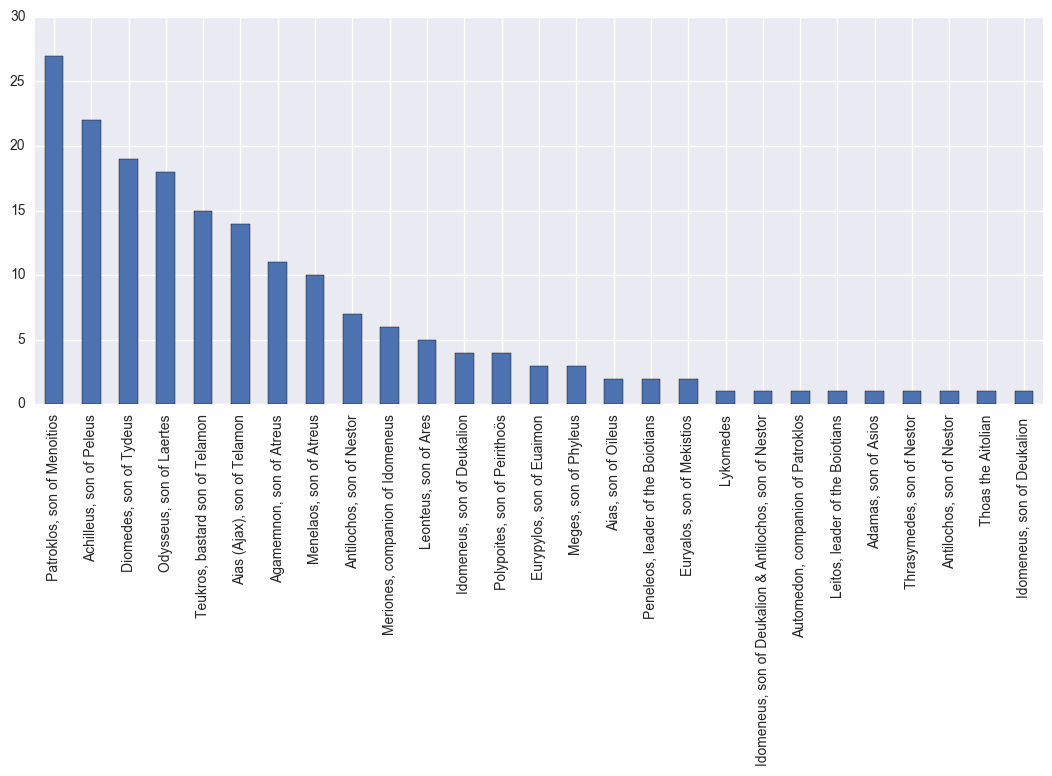

In [13]:
gkills = kills[kills.Winner.str.contains('G')]
g1 = gkills['Combatant1'][gkills.C1_Faction.str.contains('G')]
g2 = gkills['Combatant2'][gkills.C2_Faction.str.contains('G')]
gkill_list = pd.concat([g1,g2])
gkill_list.value_counts().plot(kind='bar')

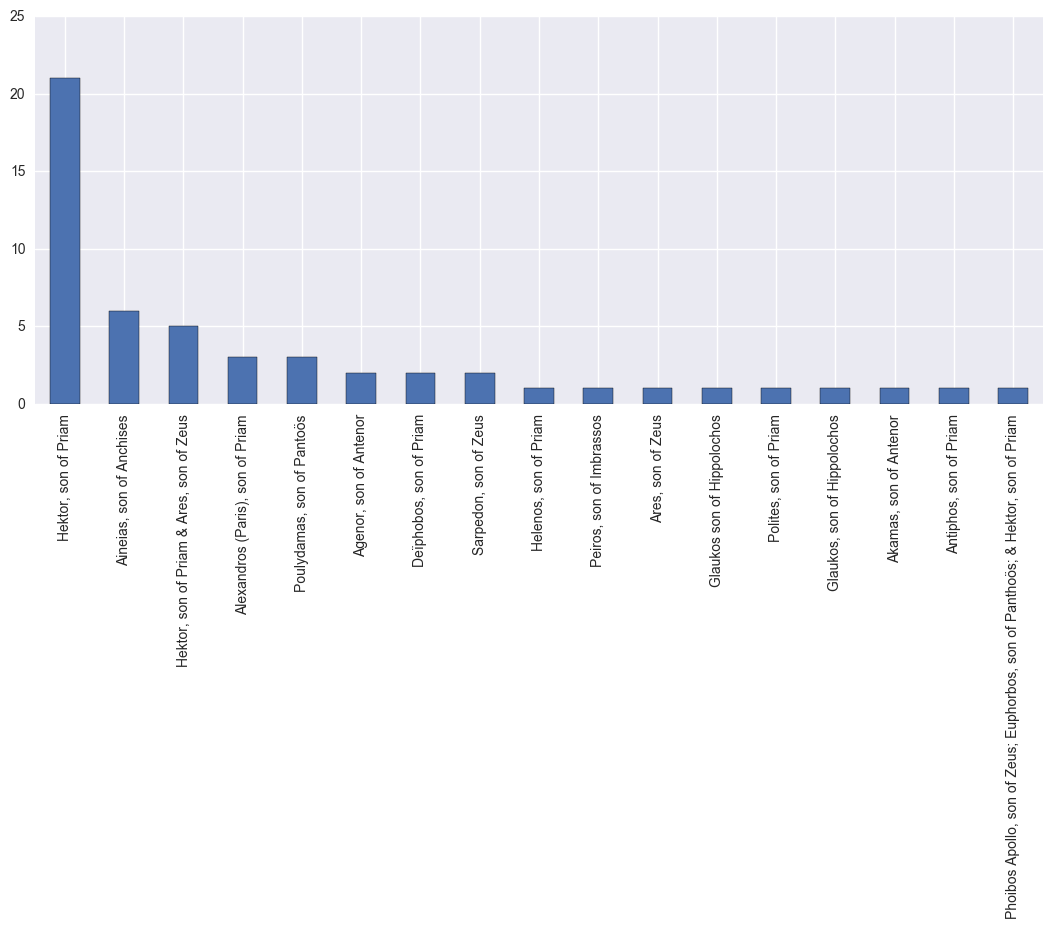

In [14]:
tkills = kills[kills.Winner.str.contains('T')]
t1 = tkills['Combatant1'][tkills.C1_Faction.str.contains('T')]
t2 = tkills['Combatant2'][tkills.C2_Faction.str.contains('T')]
tkill_list = pd.concat([t1,t2])
tkill_list.value_counts().plot(kind='bar')

In [15]:
gkills.head()

,Combatant1,Combatant2,C1_Faction,C2_Faction,Winner,Loser_Killed,Iliad_loc,Notes
1,"Antilochos, son of Nestor","Echepolos, son of Thalysias",G,T,G,yes,4.457,Echepolos killed by spear to the forehead (4.4...
3,"Aias (Ajax), son of Telamon","Simoeisios, son of Anthemion",G,T,G,yes,4.479,Simoeisios killed by spear to the right chest ...
5,"Odysseus, son of Laertes","Demokoön, bastard son of Priam",G,T,G,yes,4.499,Demokoön killed by spear to the temple (4.499-...
7,Thoas the Aitolian,"Peiros, son of Imbrassos",G,T,G,yes,4.527,"Peiros wounded by spear to the lung, then kill..."
8,"Diomedes, son of Tydeus","Phegeus, son of Dares",G,T,G,yes,5.009,Phegeus killed by spear to the chest (5.9-20)


In [16]:
df[['Combatant1', 'Combatant2']].head()

,Combatant1,Combatant2
0,"Menelaos, son of Atreus","Alexandros (Paris), son of Priam"
1,"Antilochos, son of Nestor","Echepolos, son of Thalysias"
2,"Elephanor, leader of the Abantes","Agenor, son of Antenor"
3,"Aias (Ajax), son of Telamon","Simoeisios, son of Anthemion"
4,"Antiphos, son of Priam","Leukos, companion of Odysseus"


In [17]:
# convert line locations into line ratios where 
# e.g. 1.5 refers to halfway through the first chapter
def line_ratio(lineloc):
    chapter = int(lineloc // 1)
    line = (lineloc - chapter) * 1000
    tot_lines = [611,877,461,544,909,
        529,482,565,714,579,
        848,471,837,522,725,
        867,761,617,417,503,
        611,516,898,804]
    return chapter + line / tot_lines[chapter-1]

df['line_ratios'] = df.Iliad_loc.apply(line_ratio)
#df.head()

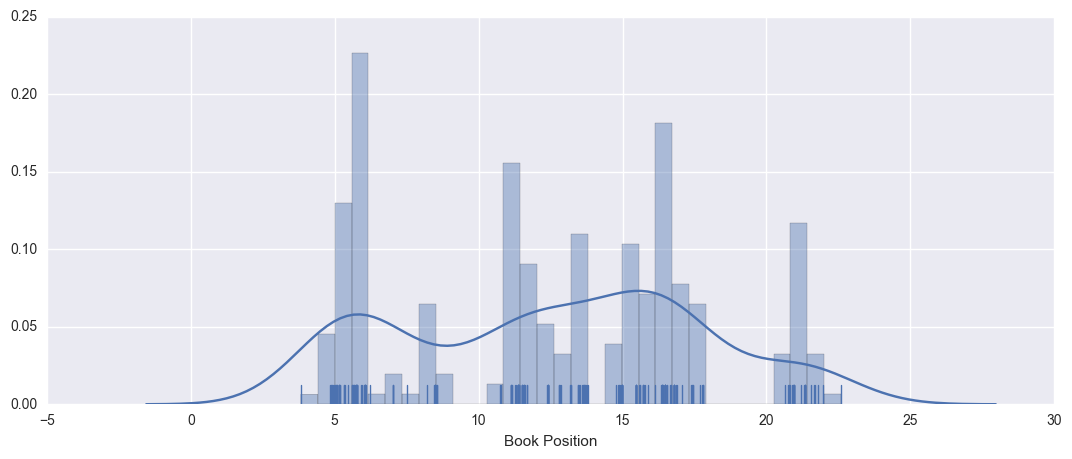

In [18]:
#df.line_ratios.plot(kind='density', rug=True)
a = sns.distplot(df.line_ratios, kde=True, rug=True, bins=32)
a.set(xlabel = 'Book Position')
plt.show()